In [12]:
import sys

sys.path.append("..")

import pandas as pd

import numpy as np

import os


from osgeo import gdal

from scipy.ndimage import distance_transform_edt
from scipy.ndimage import gaussian_filter
from skimage.measure import label

from src.utils import check_folder, array2raster, read_tiff, read_yaml, print_sucess

from generate_distance_map import apply_gaussian_distance_map

from sample_selection import filter_components_by_mask

import matplotlib.pyplot as plt

In [9]:
current_iter = 1

args = read_yaml("../args.yaml")

current_iter_folder = "/home/luiz/multi-task-fcn/2th_version_data/iter_001"

data_path = args.data_path

In [53]:
# plt.rcParams.keys()

In [54]:
plt.rcParams["figure.dpi"] = 120

In [96]:
NEW_PRED_FILE = os.path.join(current_iter_folder, "raster_prediction", f'join_class_itc{args.test_itc}_{np.sum(args.overlap)}.TIF')
new_pred_map = read_tiff(NEW_PRED_FILE)

NEW_PROB_FILE = os.path.join(current_iter_folder, "raster_prediction", f'join_prob_itc{args.test_itc}_{np.sum(args.overlap)}.TIF')
new_prob_map = read_tiff(NEW_PROB_FILE)

NEW_DEPTH_FILE = os.path.join(current_iter_folder, "raster_prediction", f'depth_itc{args.test_itc}_{np.sum(args.overlap)}.TIF')
new_depth_map = read_tiff(NEW_DEPTH_FILE)

if current_iter == 1:
    OLD_PRED_FILE = os.path.join(args.data_path, args.train_segmentation_path)

else:
    OLD_PRED_FILE = os.path.join(args.data_path, f"iter_{current_iter-1:03d}", "new_labels", f'selected_labels_set.tif')

old_pred_map = read_tiff(OLD_PRED_FILE)

ground_truth_segmentation = read_tiff(os.path.join(args.data_path, args.train_segmentation_path))


# set labels at the same scale as ground truth labels
new_pred_map += 1

# Select only the components with confidence higher than 0.95
new_pred = np.where(new_prob_map > 0.95, new_pred_map, 0)


old_components_pred_map = label(old_pred_map)

new_components_pred_map = label(new_pred)

filter_components_by_mask(data_path, new_components_pred_map, new_pred)

/home/luiz/multi-task-fcn/2th_version_data/iter_001/raster_prediction/join_class_itcFalse_1.1.TIF
/home/luiz/multi-task-fcn/2th_version_data/iter_001/raster_prediction/join_prob_itcFalse_1.1.TIF
/home/luiz/multi-task-fcn/2th_version_data/iter_001/raster_prediction/depth_itcFalse_1.1.TIF
/home/luiz/multi-task-fcn/2th_version_data/segmentation/samples_A1_train2tif.tif
/home/luiz/multi-task-fcn/2th_version_data/segmentation/samples_A1_train2tif.tif
/home/luiz/multi-task-fcn/2th_version_data/mask.tif


In [97]:
depth_map = apply_gaussian_distance_map(new_pred)

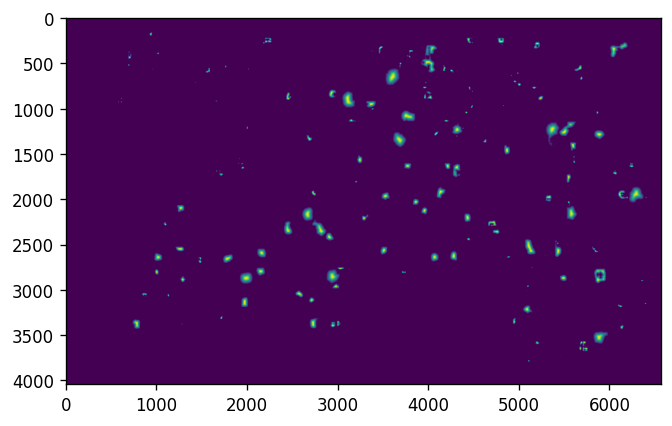

In [98]:
plt.imshow(depth_map)

In [99]:
np.max(depth_map)

1.0

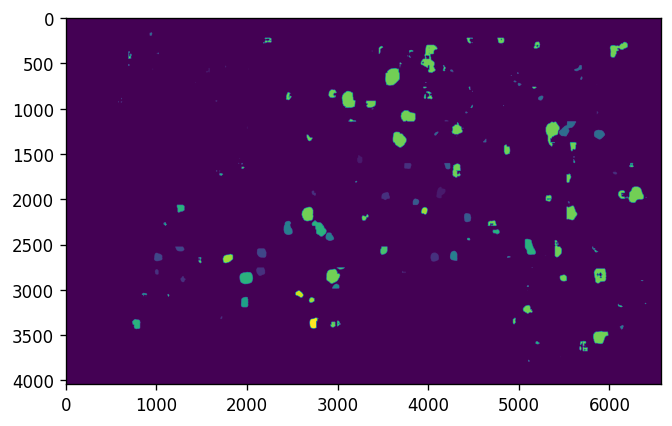

In [100]:
plt.imshow(new_pred)

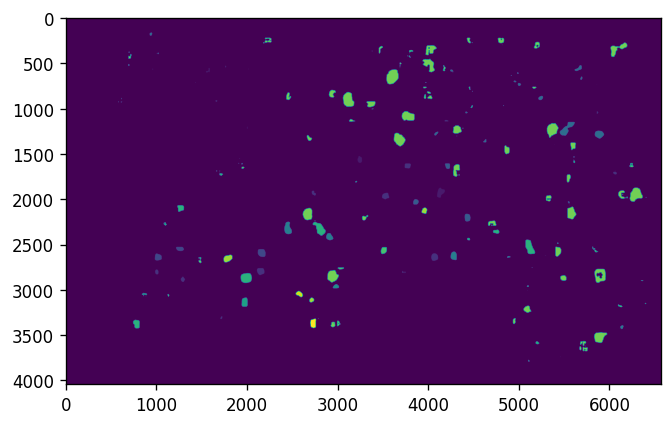

In [101]:
plt.imshow(
    np.where(depth_map > 0.2, new_pred, 0 )
)

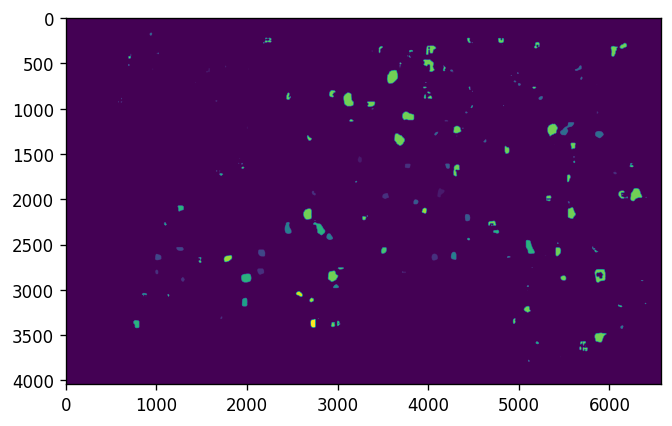

In [102]:
plt.imshow(
    np.where(depth_map > 0.3, new_pred, 0 )
)

In [103]:
new_pred = np.where(depth_map > 0.3, new_pred_map, 0 )

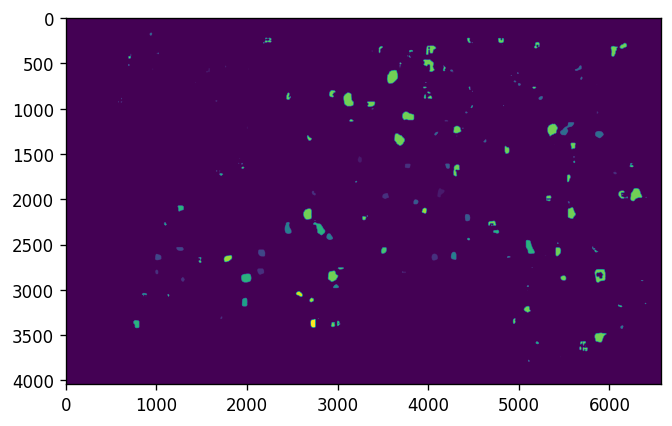

In [104]:
plt.imshow(new_pred)